In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from nicaviz import analyze as nca

import pandas as pd
import seaborn as sns
import itertools
from numpy import random

In [3]:
DFLEN = 1000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10})

display(df.sample(10))

,cont_rand,cont_uni,int_med,int_small,str_med,str_small
132,0.805427,-3.447978,0,1,e,blue
812,5.075355,-1.338462,14,1,d,red
711,4.597140,1.733591,17,1,d,blue
459,9.240613,-10.326300,3,4,c,red
956,0.768678,-3.041451,15,4,e,blue
50,1.911712,-1.440679,3,0,a,red
799,8.857237,-8.704369,15,4,a,red
949,7.489076,-5.661977,8,4,c,blue
115,0.656118,-2.239480,11,2,e,red
409,2.465309,-8.537993,10,4,f,blue


In [4]:
nca.describe(df)

Dataframe Dimension: 1000 Rows, 6 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
cont_rand,1000,0,float64,9.34609,1,1.70065,1,3.36832,1.0,5.00717,1.0,4.40303,1.0
cont_uni,1000,0,float64,-9.90952,1,-0.729843,1,-5.3362,1.0,11.3583,1.0,-2.45475,1.0
int_med,20,0,int64,4,60,15,55,11,54.0,1,53.0,6,53.0
int_small,5,0,int64,1,215,0,206,2,203.0,3,192.0,4,184.0
str_med,7,0,object,c,163,g,151,d,151.0,a,151.0,b,145.0
str_small,2,0,object,red,501,blue,499,NaN,NaN,NaN,NaN,NaN,NaN


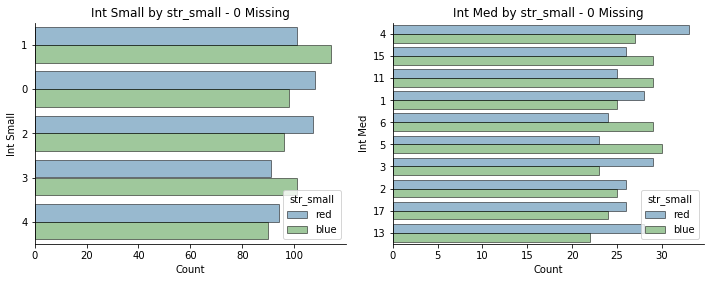

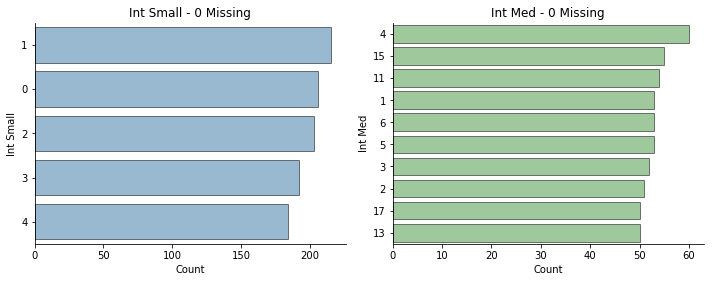

In [5]:
nca.Plotgrid(["int_small", "int_med"])\
    .build(func=nca.multi_plot,
           df=df,
           hue="str_small",
           iti_palette=sns.color_palette("Paired")[1::2],
           plottype="countplot")

nca.Plotgrid(["int_small", "int_med"])\
    .build(func=nca.multi_plot,
           df=df,
           iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]),
           plottype="countplot")

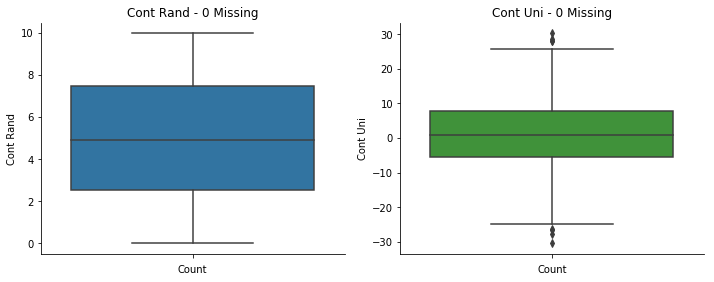

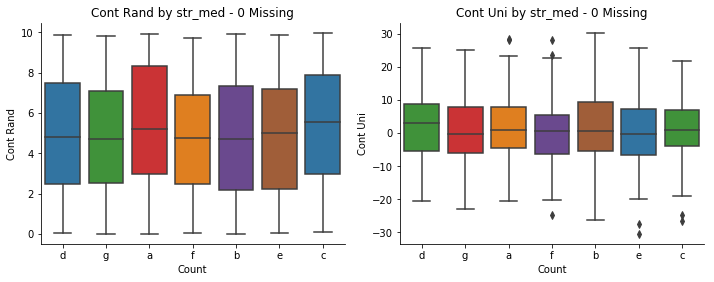

In [6]:
nca.Plotgrid(["cont_rand", "cont_uni"])\
    .build(func=nca.multi_plot,
           df=df, iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]),
           plottype="boxplot")
nca.Plotgrid(["cont_rand", "cont_uni"])\
    .build(func=nca.multi_plot, df=df, hue='str_med',
       iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]),
       plottype="boxplot")

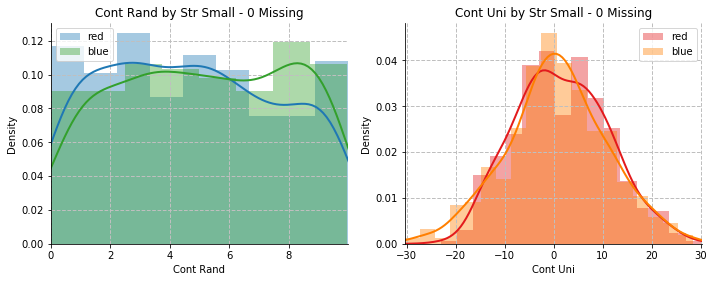

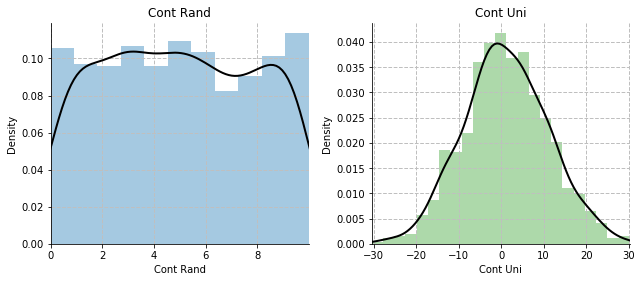

In [7]:
nca.Plotgrid(["cont_rand", "cont_uni"])\
    .build(func=nca.custom_distplot,
          df=df,
          iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]),
          hue = "str_small")

nca.Plotgrid(["cont_rand", "cont_uni"], 2, [9,4])\
    .build(func=nca.custom_distplot,
           df=df,
           iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]))

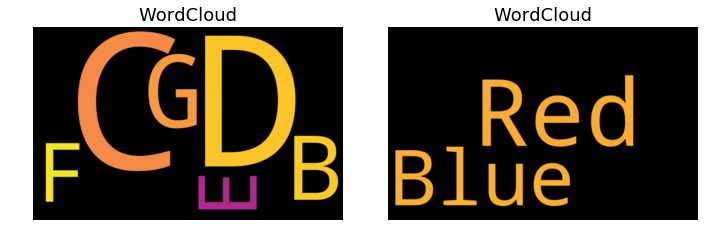

In [8]:
nca.Plotgrid(["str_med", "str_small"])\
    .build(func=nca.plot_cloud, df=df)

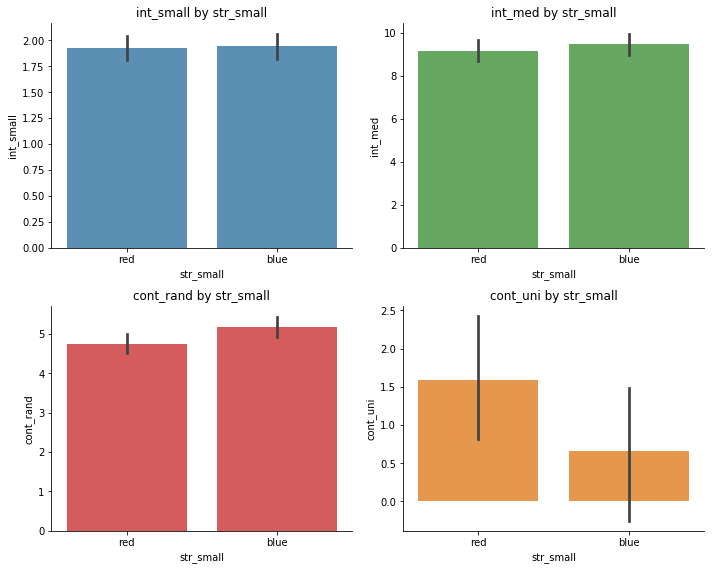

In [12]:
nca.Plotgrid(["int_small", "int_med", "cont_rand", "cont_uni"])\
    .build(func=nca.single_bar,
           df=df,
           x_var="str_small",
           iti_palette=itertools.cycle(sns.color_palette("Paired")[1::2]))